In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


In [2]:
filename = 'NFA2018.csv'

df = pd.read_csv(filename)

In [3]:
df.shape

(87020, 15)

In [4]:

df.describe()


,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
count,87020.000000,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,8.702000e+04,71410.000000,8.702000e+04
mean,1989.193059,1.465068e+07,6.324612e+06,1.531334e+07,3.576364e+06,1.311909e+06,2.591459e+07,5.217695e+07,10129.722779,6.305956e+07
std,15.490923,1.445766e+08,6.237420e+07,1.798437e+08,3.905889e+07,1.448057e+07,3.448775e+08,5.890184e+08,15646.206882,4.264394e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.150000e-05,115.794000,5.000000e+03
25%,1976.000000,3.027605e-01,7.470049e-02,1.508091e-01,3.252735e-02,0.000000e+00,1.946352e-02,1.313131e+00,988.470000,2.001000e+06
50%,1990.000000,2.841671e+00,2.526463e+00,3.110603e+00,3.670478e+00,3.247780e-02,1.293047e+00,1.858845e+02,3153.740000,6.632500e+06
75%,2003.000000,2.027347e+06,6.580112e+05,1.497303e+06,2.436509e+05,5.794159e+04,9.168465e+05,7.792829e+06,11972.100000,2.056300e+07
max,2014.000000,3.996304e+09,1.576582e+09,5.496461e+09,1.127790e+09,4.649979e+08,1.251963e+10,2.060191e+10,113682.000000,7.265786e+09


In [5]:

df.rename(columns={'country': 'País',
                   'UN_region': 'Região',
                   'year': 'ano',
                   'crop_land':'terras_plantio',
                   'grazing_land':'terras_agricolas',
                   'forest_land':'terras_florestais',
                   'built_up_land':'contruçoes',
                   'carbon':'carbono',
                   'population':'população',
                   'ISO alpha-3 code':'abrev'
                  }, inplace=True)

In [6]:
df.sample(100)

,País,abrev,Região,UN_subregion,ano,record,terras_plantio,terras_agricolas,terras_florestais,fishing_ground,contruçoes,carbono,total,Percapita GDP (2010 USD),população
36328,Israel,ISR,Asia,Western Asia,1983,EFProdPerCap,3.915916e-01,1.227898e-02,2.053578e-02,4.167312e-02,7.268046e-02,1.969049e+00,2.507809e+00,18433.100,3950000
10008,Myanmar,MMR,Asia,South-Eastern Asia,1983,EFProdPerCap,4.327345e-01,8.371962e-03,2.307909e-01,2.477724e-02,4.619399e-02,4.862437e-02,7.914930e-01,231.661,36918000
35297,Iraq,IRQ,Asia,Western Asia,1982,EFImportsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,1.025946e+07,3248.890,14438000
19197,Denmark,DNK,Europe,Northern Europe,1967,EFImportsTotGHA,2.628367e+06,3.067404e+05,2.182878e+06,1.673475e+06,0.000000e+00,8.577120e+06,1.536858e+07,27411.500,4831000
13123,Central African Republic,CAF,Africa,Middle Africa,2006,EFConsTotGHA,1.363654e+06,2.459257e+06,1.376951e+06,5.249027e+04,1.372981e+05,1.761871e+05,5.565837e+06,422.439,4127000
48929,Mauritius,MUS,Africa,Eastern Africa,1975,EFProdTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,3.639989e+05,NaN,892000
30699,Guatemala,GTM,Latin America and the Caribbean,Central America,2010,EFProdTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,2.193763e+07,2825.520,14732000
69075,South Africa,ZAF,Africa,Southern Africa,1998,EFExportsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,3.036868e+07,5745.300,43584000
56456,Norway,NOR,Europe,Northern Europe,2013,EFImportsPerCap,8.311512e-01,6.691051e-02,6.002791e-01,8.284108e-01,0.000000e+00,3.679902e+00,6.006654e+00,88538.700,5083000
49974,Mongolia,MNG,Asia,Eastern Asia,1972,EFExportsPerCap,NaN,NaN,NaN,NaN,NaN,NaN,2.641703e+00,NaN,1357000


In [7]:
import matplotlib.pyplot as plt
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots(figsize =(10,10))

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

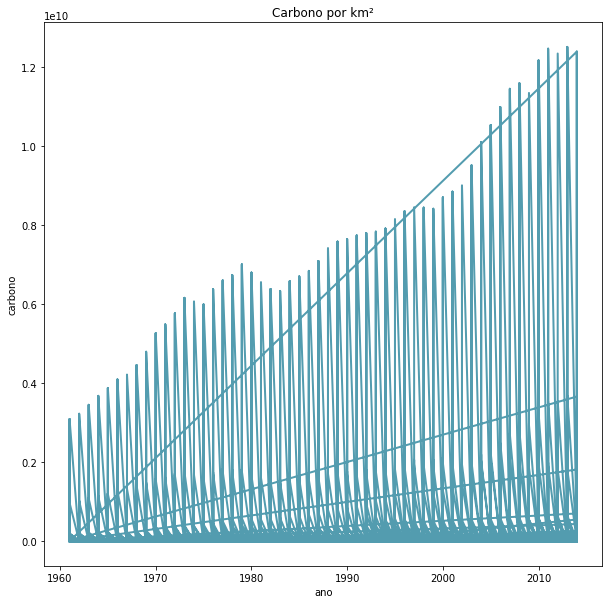

In [9]:
lineplot(df['ano'],df['carbono'],"ano","carbono","Carbono por km²")

In [10]:
dt = df.sort_values(by = ['ano'])

In [11]:
dt.tail(10)

,País,abrev,Região,UN_subregion,ano,record,terras_plantio,terras_agricolas,terras_florestais,fishing_ground,contruçoes,carbono,total,Percapita GDP (2010 USD),população
61006,Portugal,PRT,Europe,Southern Europe,2014,EFImportsPerCap,8.811095e-01,2.469300e-01,4.759854e-01,3.404023e-01,0.000000e+00,1.965453e+00,3.909880e+00,21533.500,10402000
28935,Ghana,GHA,Africa,Western Africa,2014,EFExportsTotGHA,5.460119e+06,7.756036e+03,5.208509e+05,1.879861e+05,0.000000e+00,1.147059e+06,7.323772e+06,1659.780,26787000
28933,Ghana,GHA,Africa,Western Africa,2014,EFConsTotGHA,1.531720e+07,1.966106e+06,1.777009e+07,4.832824e+06,2.168979e+06,1.031990e+07,5.237510e+07,1659.780,26787000
28932,Ghana,GHA,Africa,Western Africa,2014,EFConsPerCap,5.718232e-01,7.339885e-02,6.633948e-01,1.804195e-01,8.097253e-02,3.852634e-01,1.955272e+00,1659.780,26787000
28931,Ghana,GHA,Africa,Western Africa,2014,BiocapTotGHA,1.886266e+07,6.533657e+06,7.342871e+06,1.539143e+06,2.168979e+06,0.000000e+00,3.644731e+07,1659.780,26787000
28930,Ghana,GHA,Africa,Western Africa,2014,BiocapPerCap,7.041825e-01,2.439152e-01,2.741248e-01,5.745944e-02,8.097253e-02,0.000000e+00,1.360654e+00,1659.780,26787000
34200,India,IND,Asia,Southern Asia,2014,BiocapPerCap,3.490759e-01,3.251691e-03,2.146821e-02,2.839220e-02,4.998551e-02,0.000000e+00,4.521735e-01,1646.780,1295292000
34201,India,IND,Asia,Southern Asia,2014,BiocapTotGHA,4.521546e+08,4.211882e+06,2.780756e+07,3.677613e+07,6.474573e+07,0.000000e+00,5.856959e+08,1646.780,1295292000
28934,Ghana,GHA,Africa,Western Africa,2014,EFExportsPerCap,2.038377e-01,2.895490e-04,1.944446e-02,7.017916e-03,0.000000e+00,4.282213e-02,2.734118e-01,1659.780,26787000
46078,Malawi,MWI,Africa,Eastern Africa,2014,EFProdPerCap,4.593025e-01,5.201910e-02,1.876244e-01,1.183668e-02,5.633590e-02,2.628141e-02,7.933999e-01,484.369,16695000


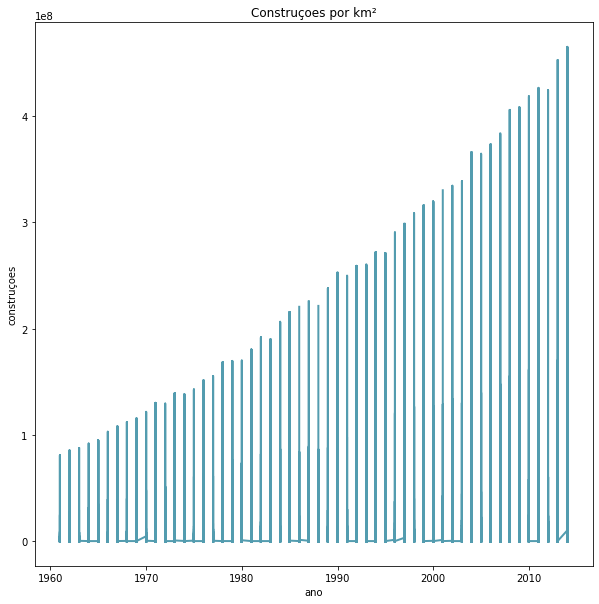

In [12]:
lineplot(dt['ano'],dt['contruçoes'],"ano","construçoes","Construçoes por km²")

In [ ]:
dt.groupby('carbono').size().sort_values().plot(kind='barh')

In [ ]:
def yearonly(data):
    year = []
    for x in data:
        x = x.split("-")
        year.append(x[0])
        return year

In [ ]:
df.sort_values(by=['ano'], inplace=True)

In [ ]:
df.groupby('Aumento de temperatura').size().sort_values().tail(35).plot(kind='barh', figsize=(15,10))

In [ ]:
# Imprimindo as vítimas menores de 15 anos
for i in range(len(df)):
    if df['IdadeVitima'][i] <= 15:
        print('____________________________')
        print('Nome: ', df['NomeVitima'][i])
        print('Idade: ', df['IdadeVitima'][i])
        print('Causa da Morte: ', df['CausaMortis'][i])
        print('____________________________')